In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
import matplotlib.style as style
style.use('ggplot')

%matplotlib inline

In [140]:
# Load joined dataframe
df = pd.read_csv('csv/metadata_text_merged_cleaned.csv')
# Remove rows with empty text column for now
df = df.dropna(subset=['text'])

# Search and Visualization of Term Occurrences:
This tool enables you to visualize changes in the frequency of term occurrences in this corpus over space and time.

Usage: Modify what's within the brackets next to the variable named "terms" below. Click on the cell below and press Shift + Return in order to run the cell (alternatively, click on the cell below and select Select Cell -> Run Cells in the menu above).

('Filtering for term:', ['slaves'], '(868 total letters)')
First 5 rows of filtered dataframe:


,UID,Vol,LetterNo,Sender,Place Sent From,Ship Name,Place Going To,Date,Boat/Fort,RAC/Other Nation,text,Year,Month,text_cleaned,text_cleaned_dealiased,filtered
0,1,1,1,James Parris,Sekondi,NaN,Cape Coast Castle,25,Fort,RAC,These are to give you an account of our affair...,1683.0,3.0,give account affaires att first comeing addoom...,give account affairs at first coming adoms ord...,True
5,6,1,6,Mark Bedford Whiting,Sekondi,NaN,Cape Coast Castle,30,Fort,RAC,Your Worships of the 28th instant I have per t...,1683.0,6.0,worships 28th instant per 9 hand canoe goods m...,worships 28th instant per 9 hand canoe goods m...,True
30,31,1,31,Mark Bedford Whiting,Sekondi,NaN,Cape Coast Castle,27,Fort,RAC,Your Worships of the 24th instant I have recei...,1683.0,10.0,worships 24th instant received per captain cof...,worships 24th instant received per captain cof...,True
39,40,1,40,James Nightingale,Komenda,NaN,Cape Coast Castle,02,Fort,RAC,Your honours dated the 29th November came safe...,1681.0,12.0,honours dated 29th november came safe hands pu...,honours dated 29th november came safe hands pu...,True
50,51,1,51,James Nightingale,Komenda,NaN,Cape Coast Castle,05,Fort,RAC,Your honours dated ultimo December came safe t...,1682.0,1.0,honours dated ultimo december came safe hands ...,honours dated ultimo december came safe hands ...,True


UIDs of letters containing the term:
[   1    6   31   40   51   59   60   76   81   82   86  110  117  118
  119  121  122  137  149  158  164  193  200  211  212  214  225  241
  242  243  245  251  259  262  267  268  269  270  271  274  275  288
  302  314  316  325  330  333  334  347  357  372  377  378  380  383
  384  388  390  391  392  393  395  396  397  398  399  400  407  408
  409  414  415  417  418  420  422  423  424  425  426  429  430  431
  432  433  434  435  436  438  439  440  441  442  446  447  451  453
  454  455  456  458  459  464  465  466  467  469  470  471  472  473
  474  476  477  478  479  480  481  482  483  484  485  486  487  488
  489  490  492  493  494  495  500  506  507  510  511  513  514  518
  520  522  523  524  525  526  527  530  531  532  533  534  541  542
  543  544  545  546  547  548  551  558  559  560  561  562  563  564
  565  566  567  568  569  570  571  572  573  575  576  578  579  580
  582  583  584  586  587  588  589  590

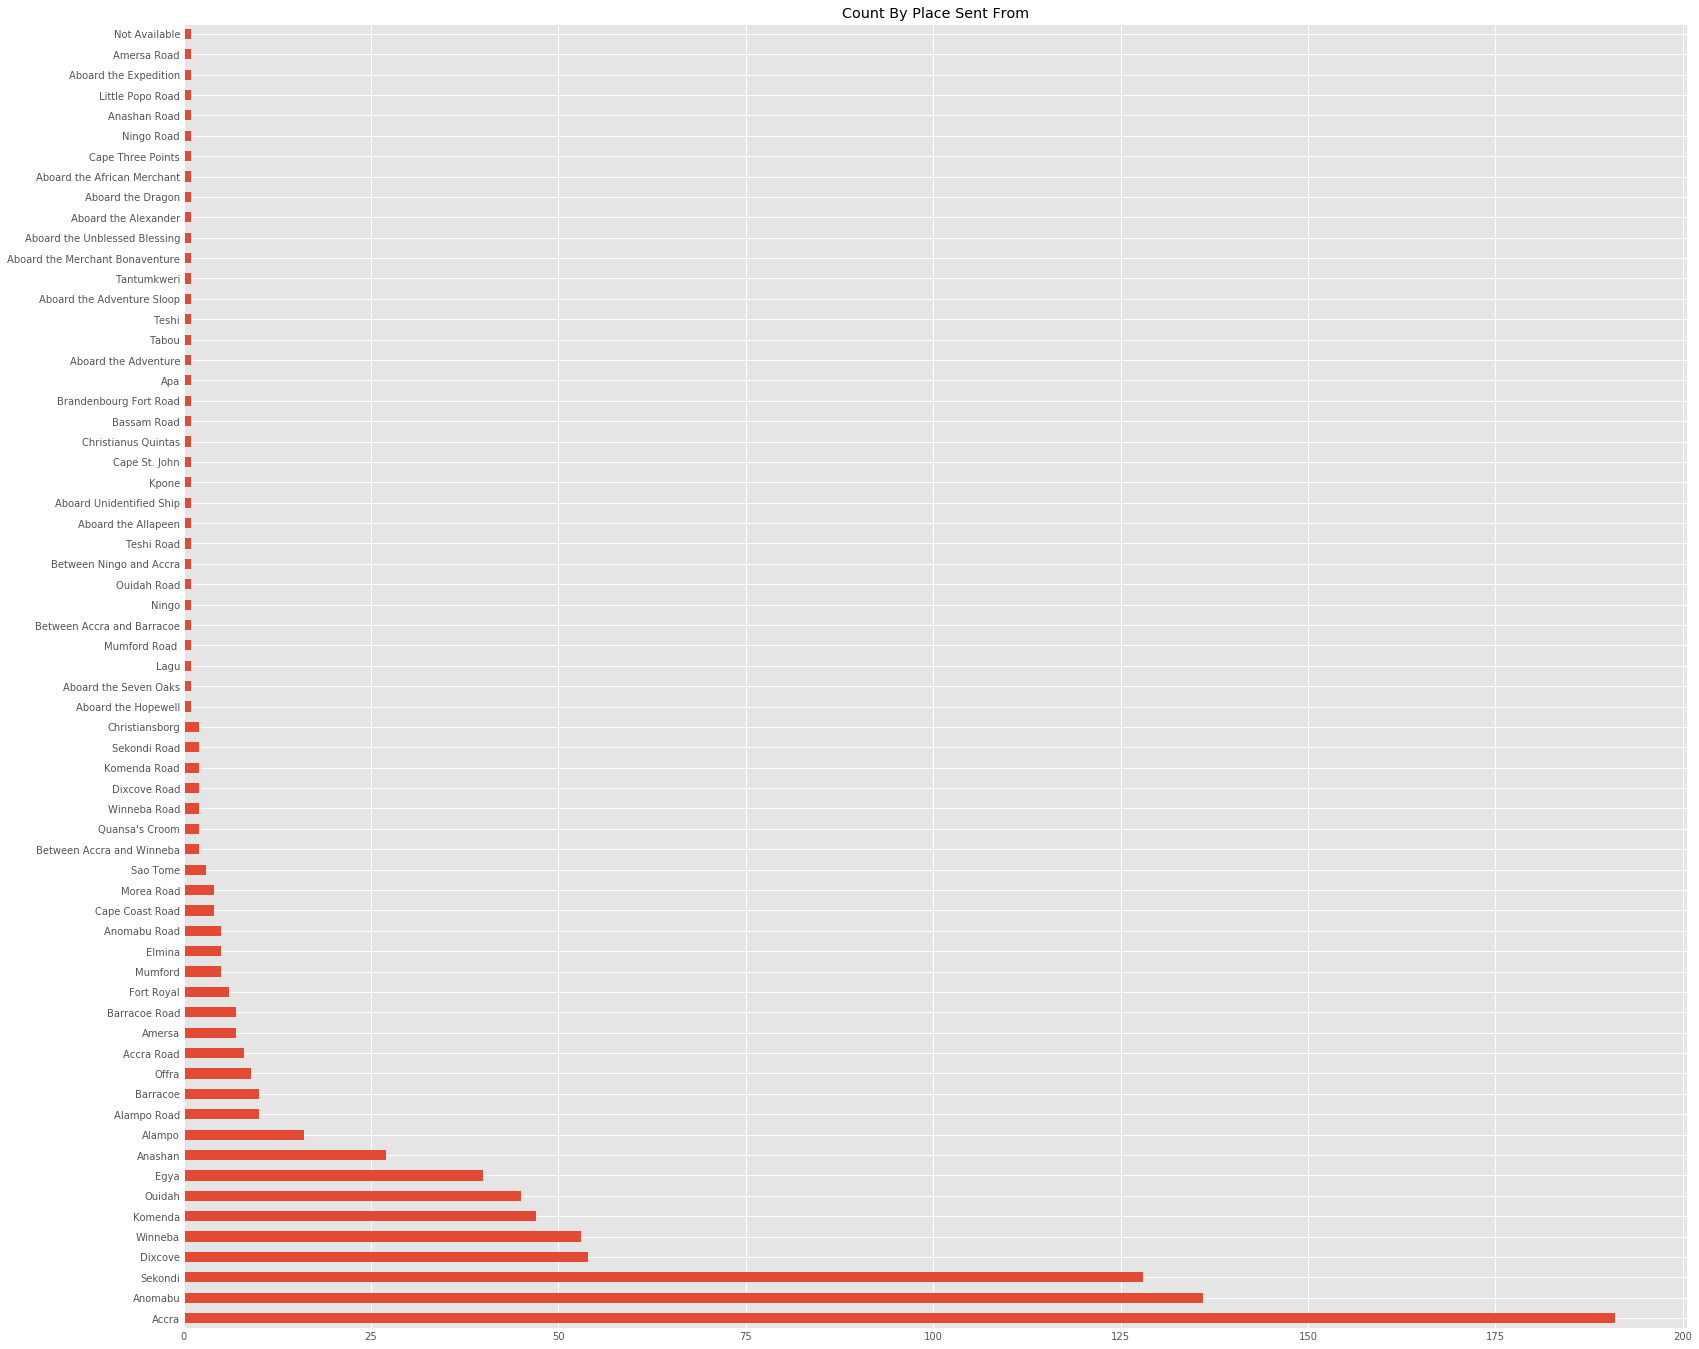

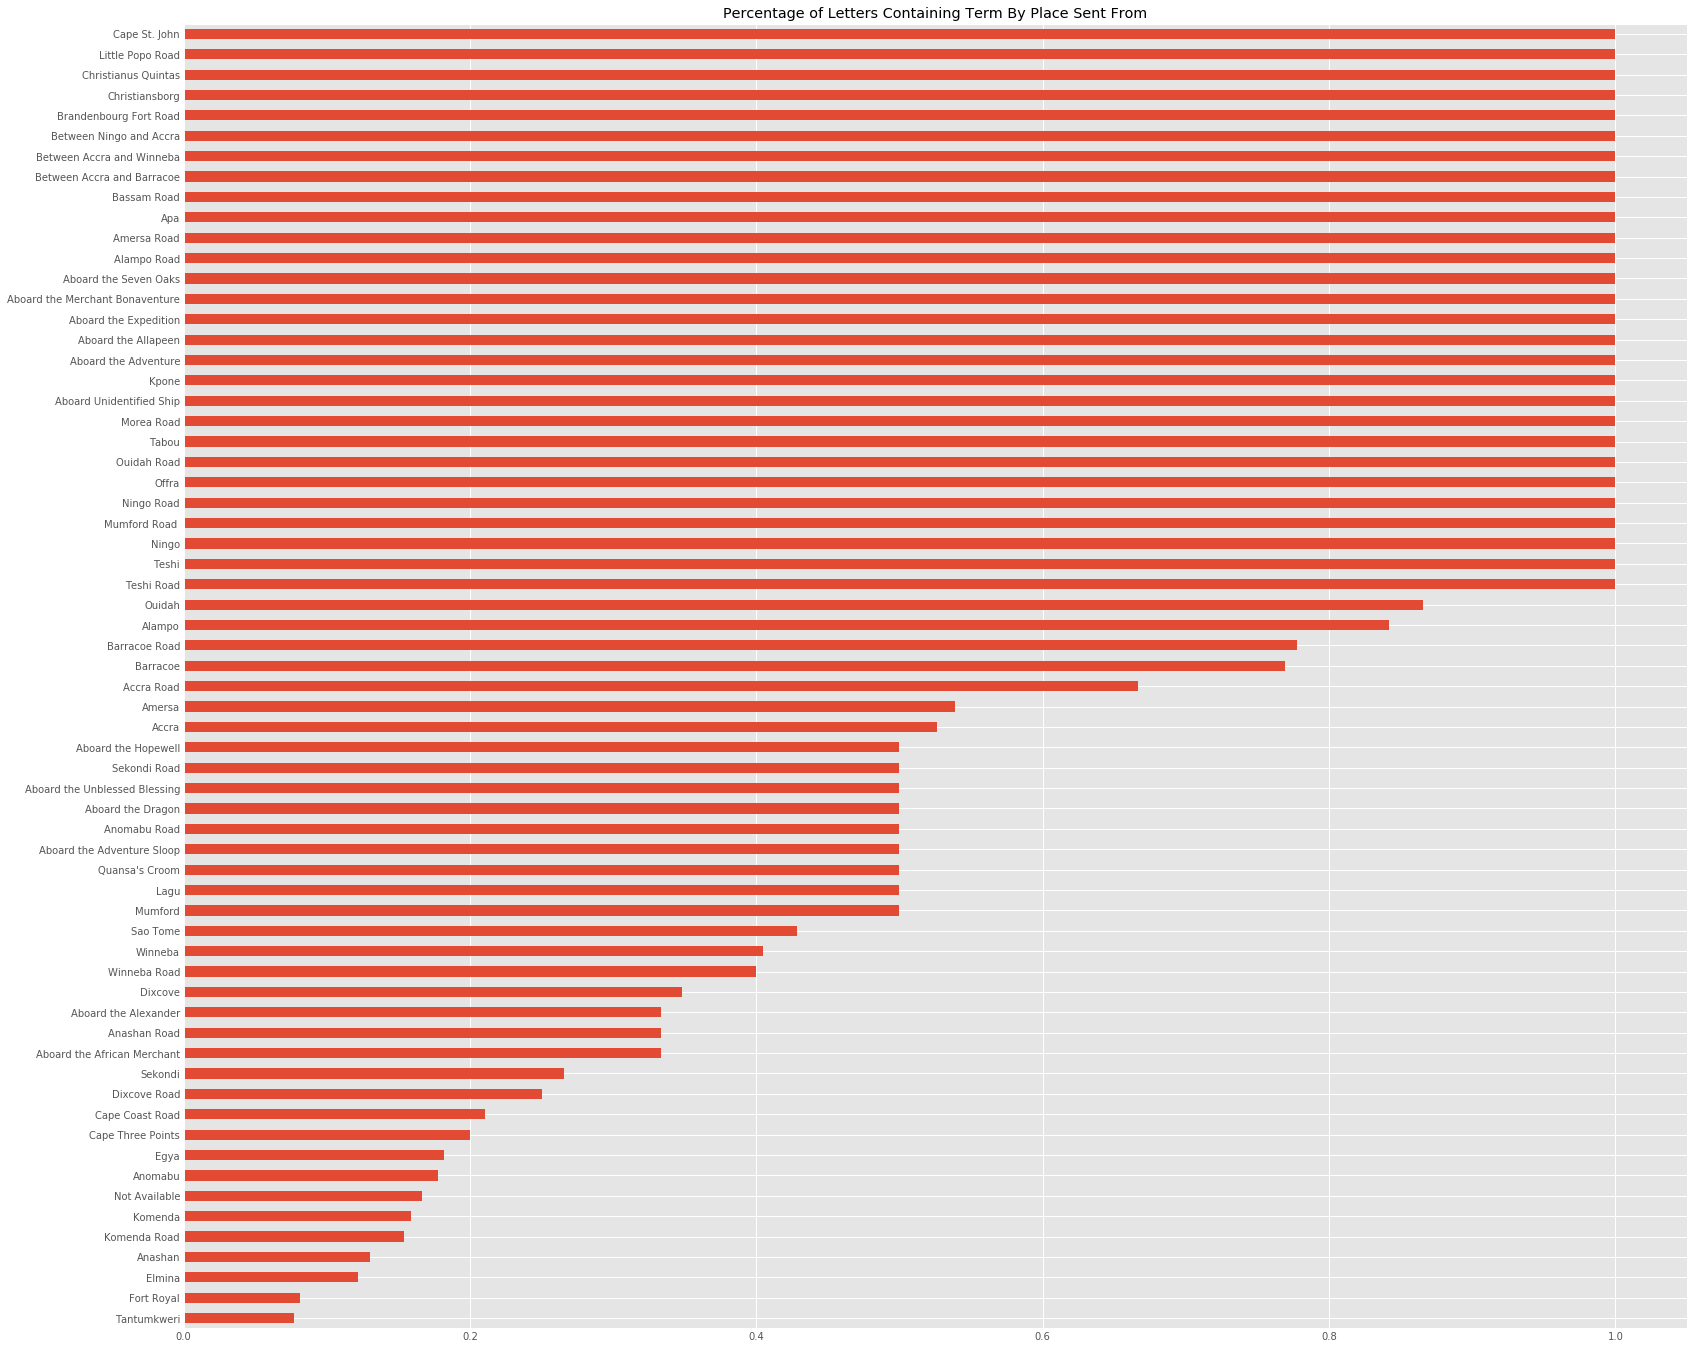

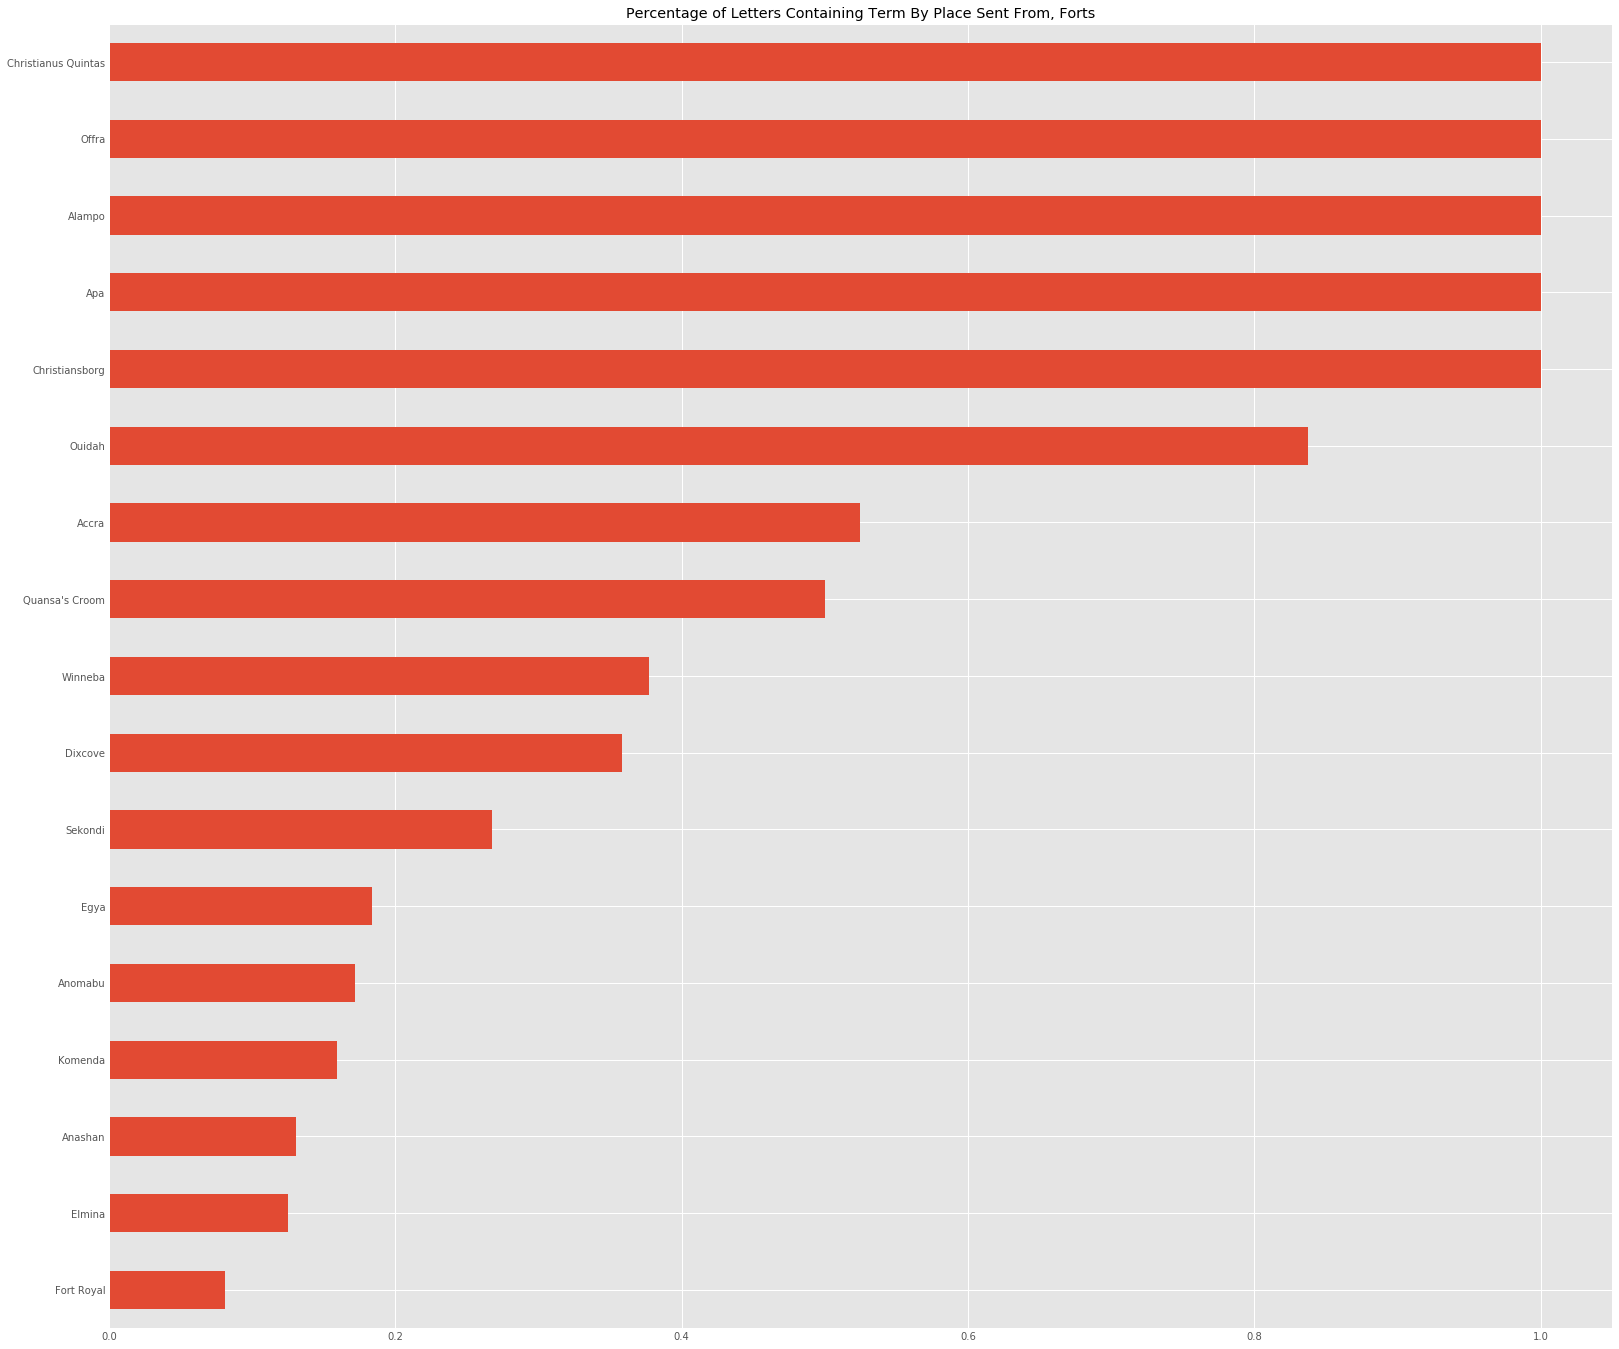

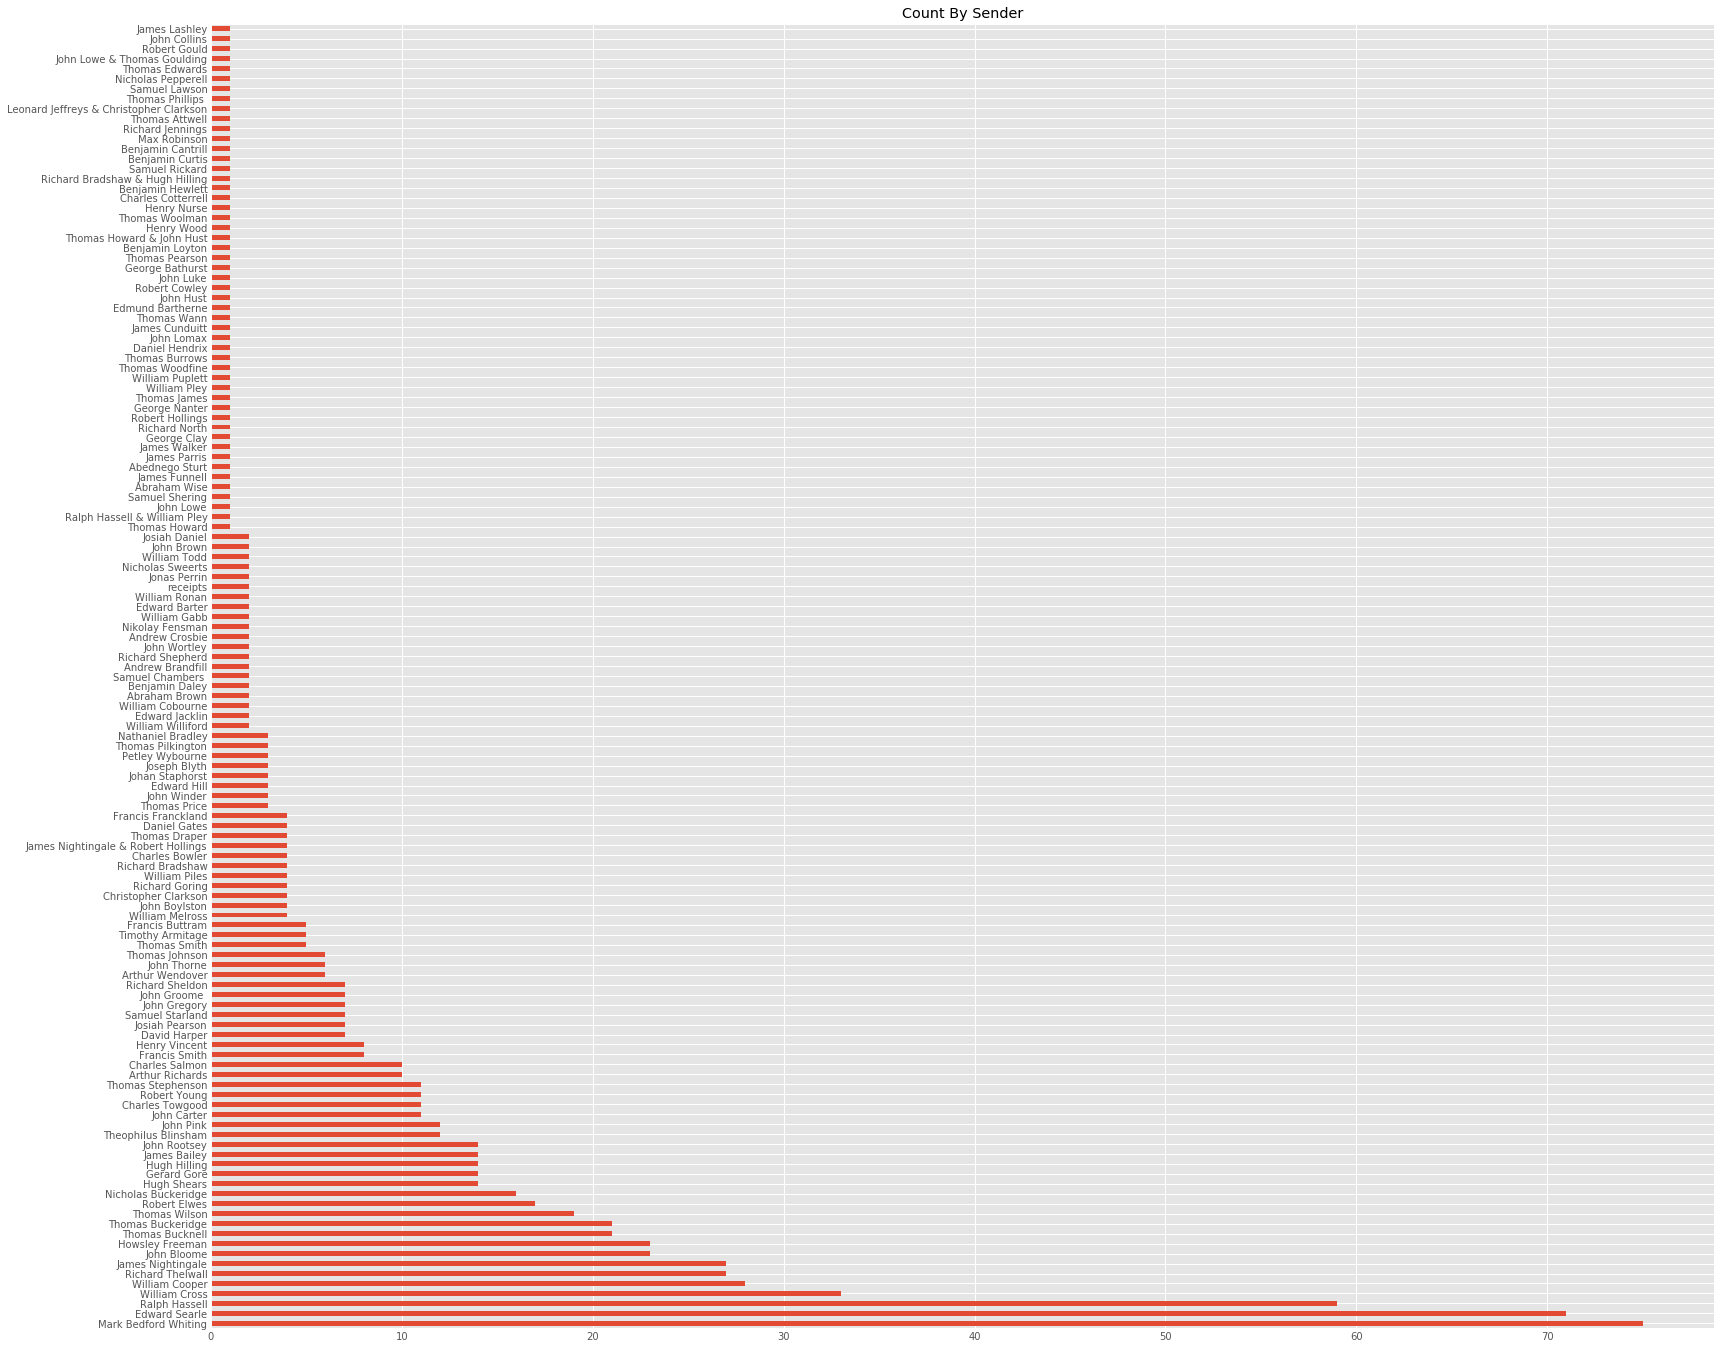

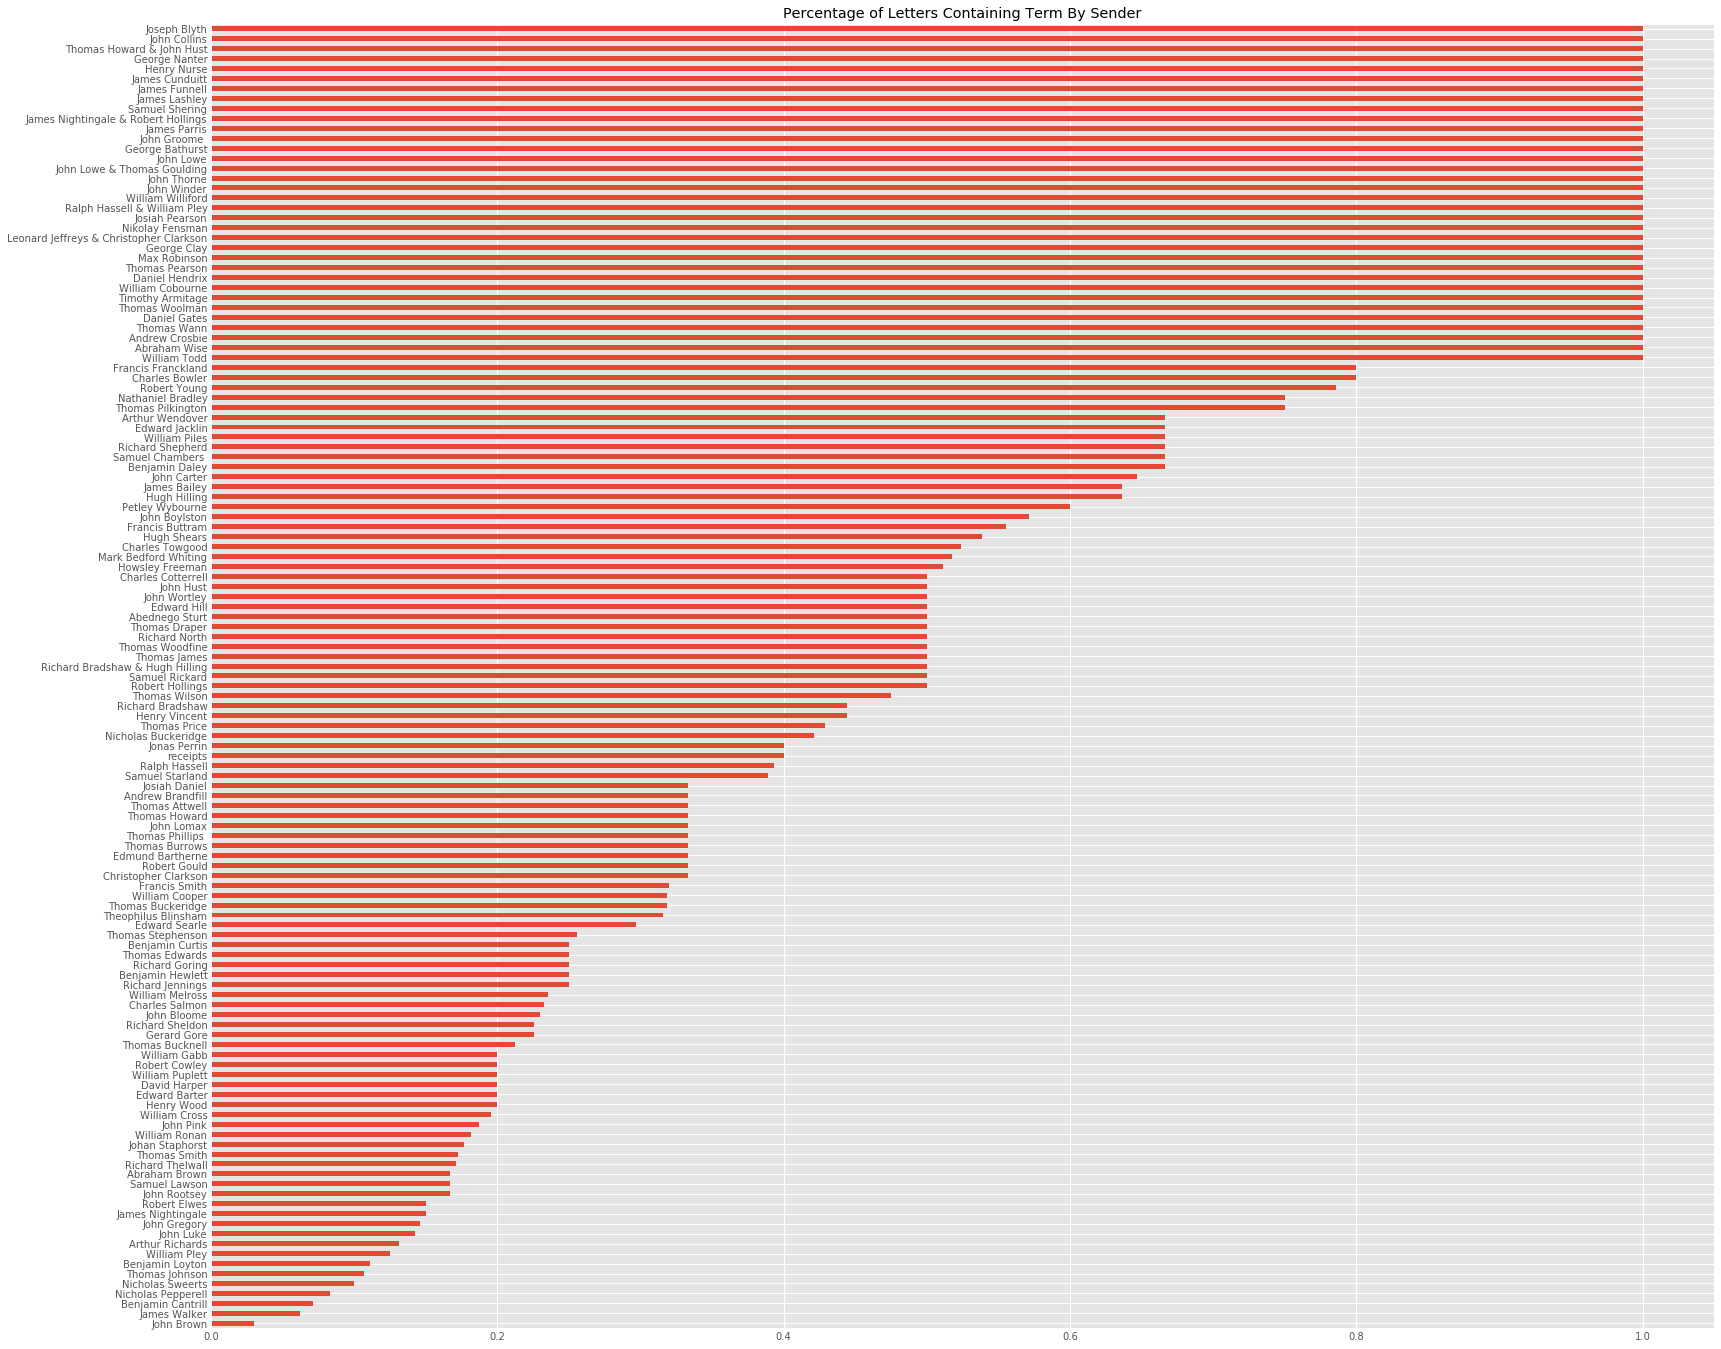

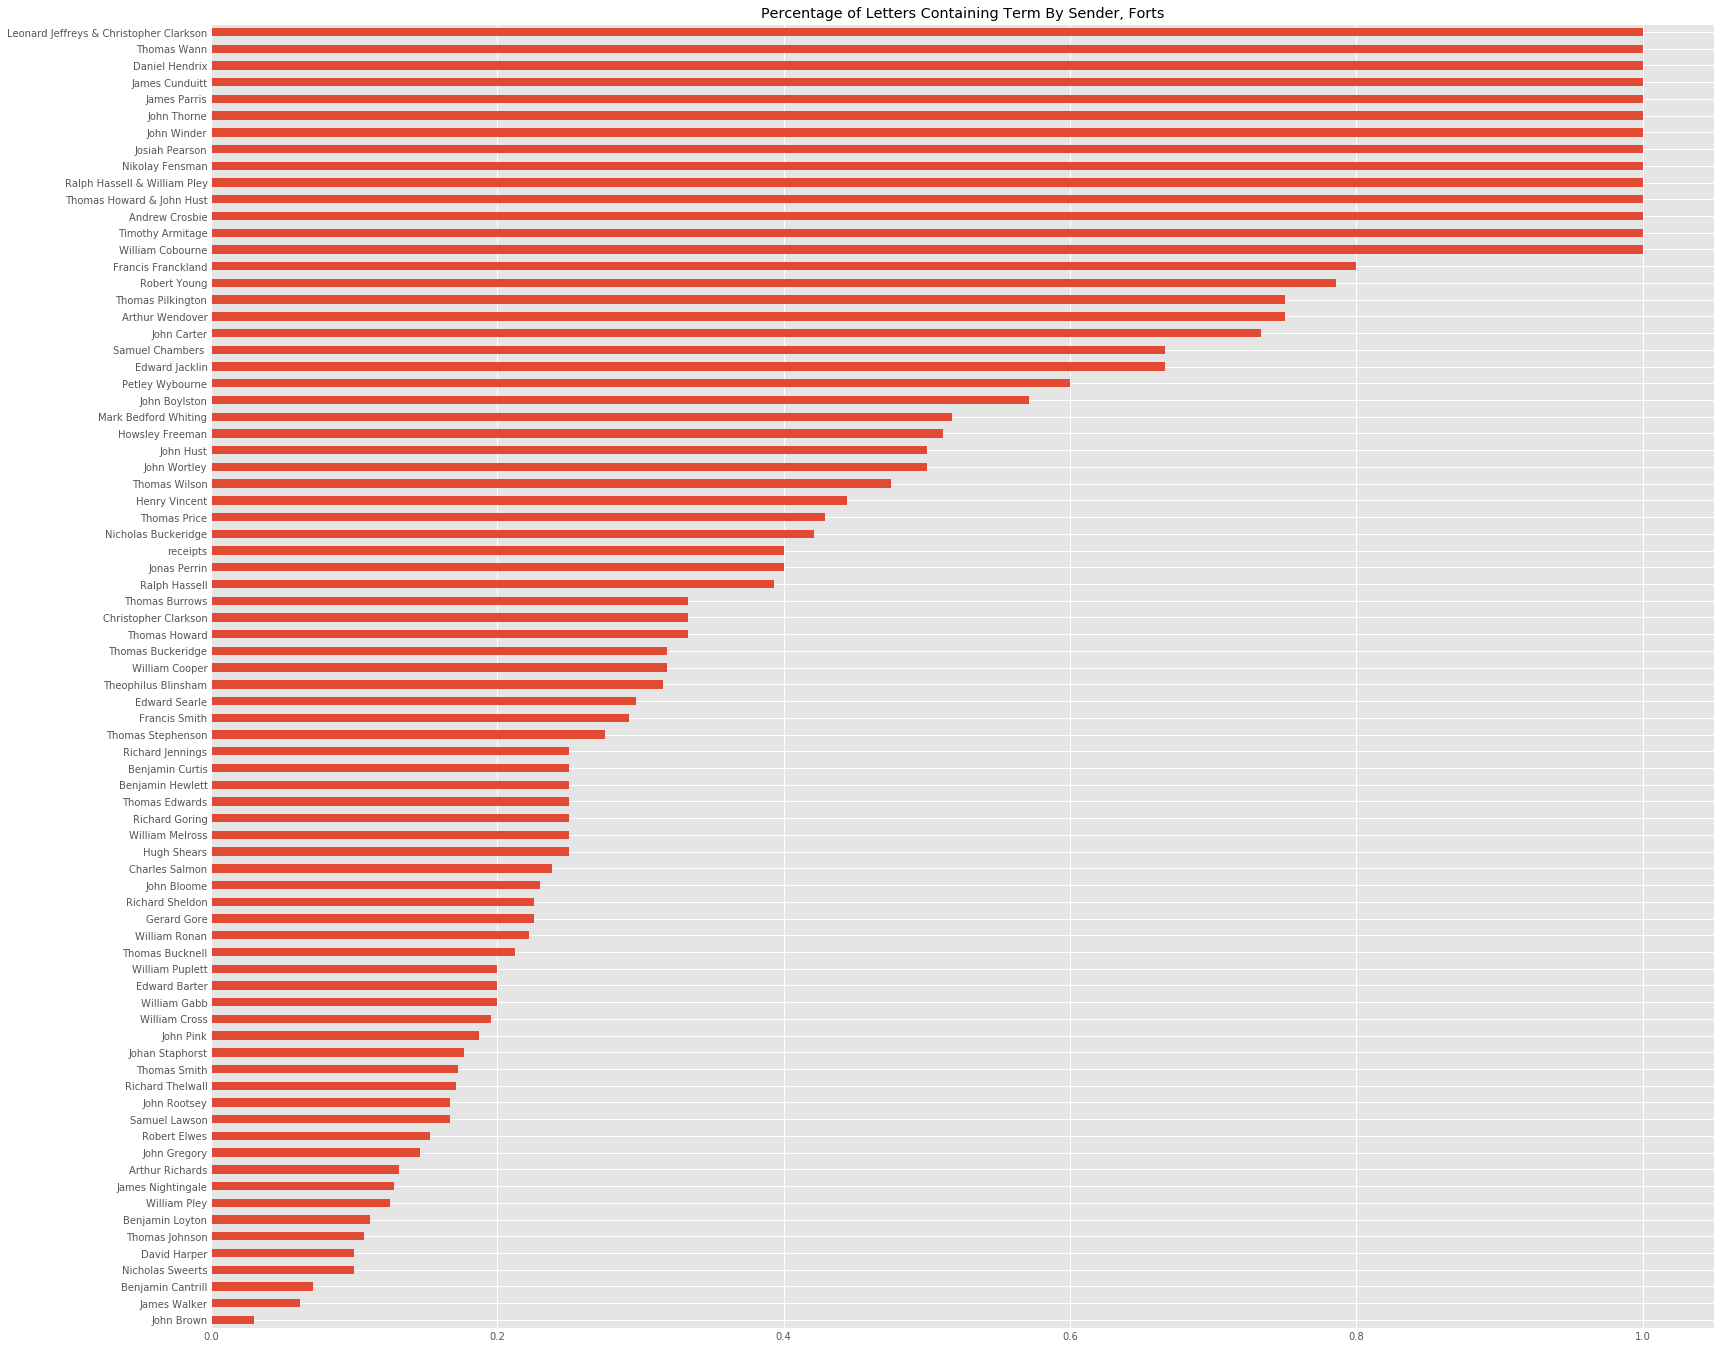

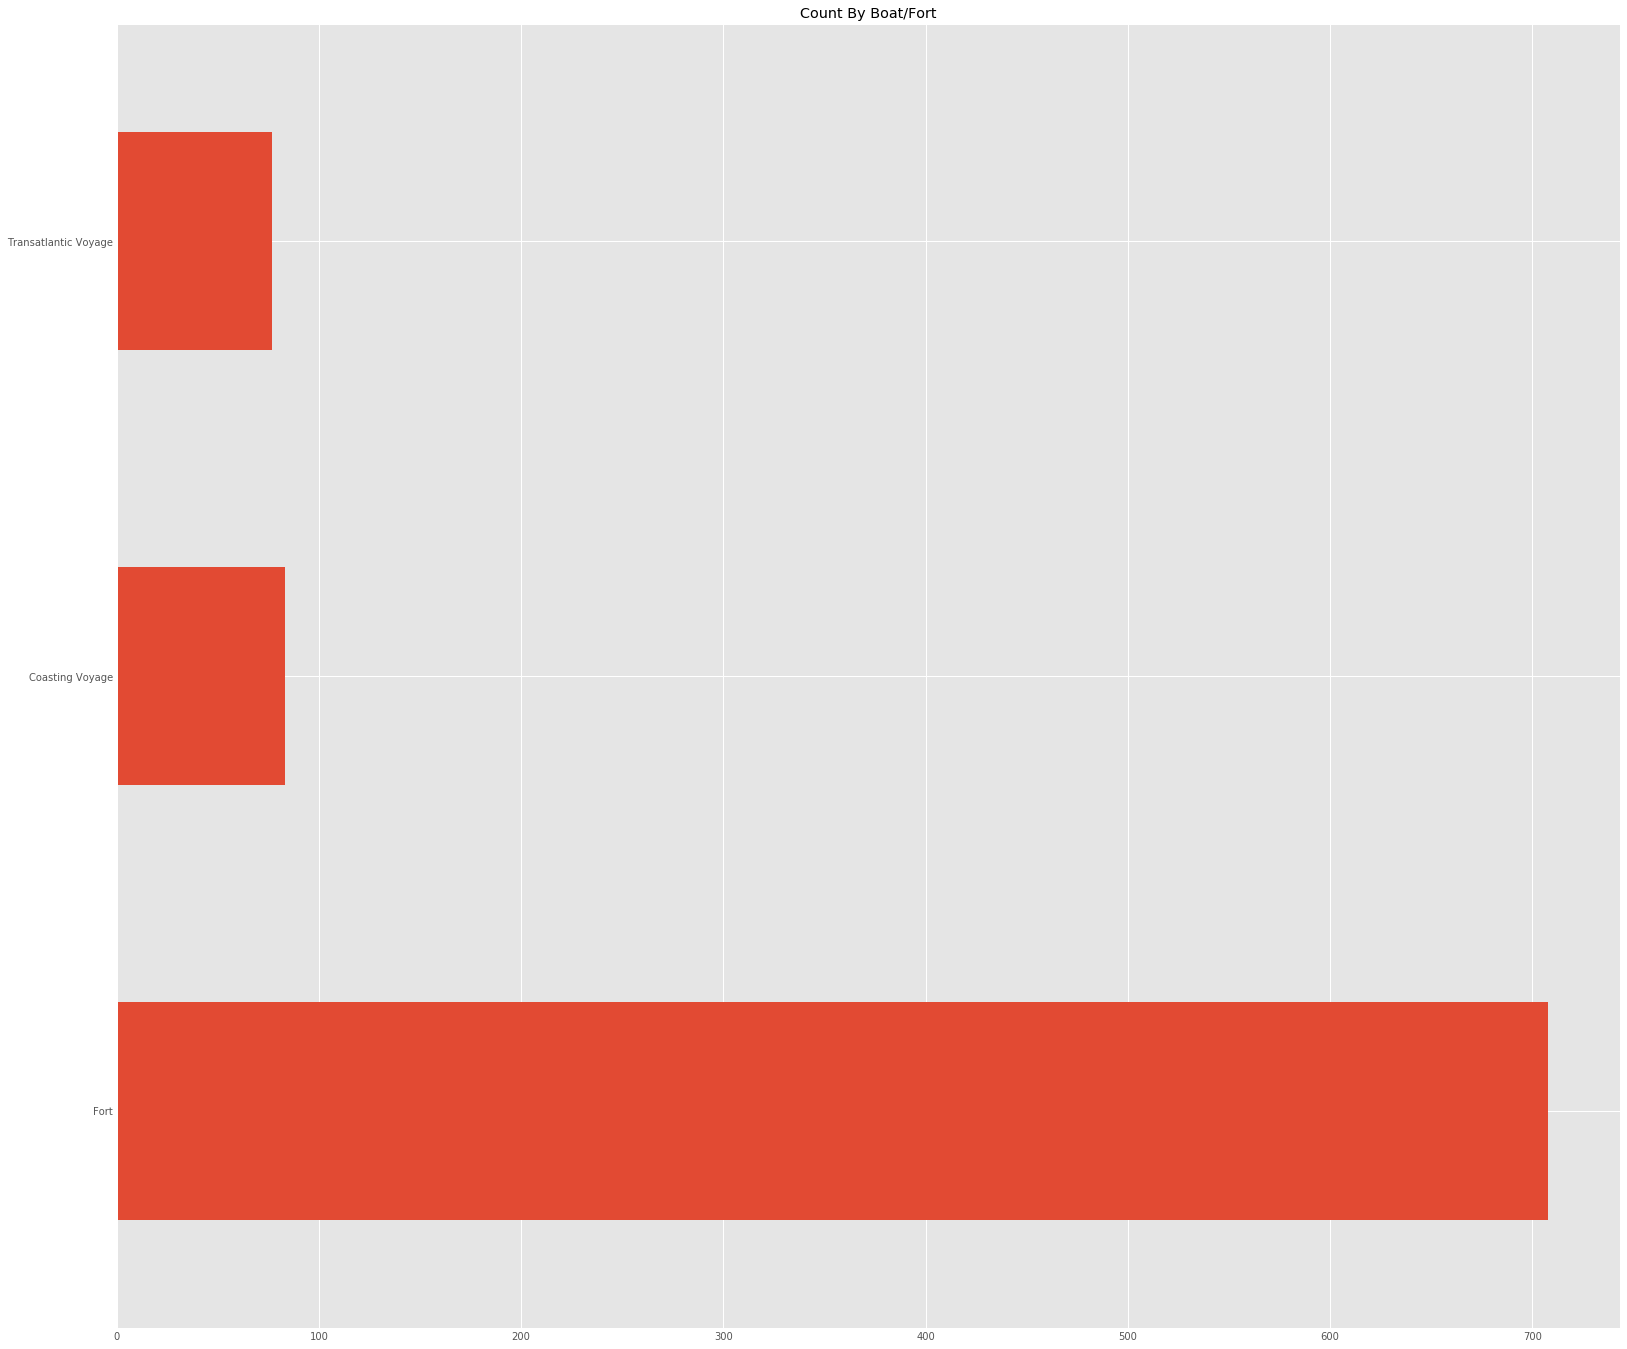

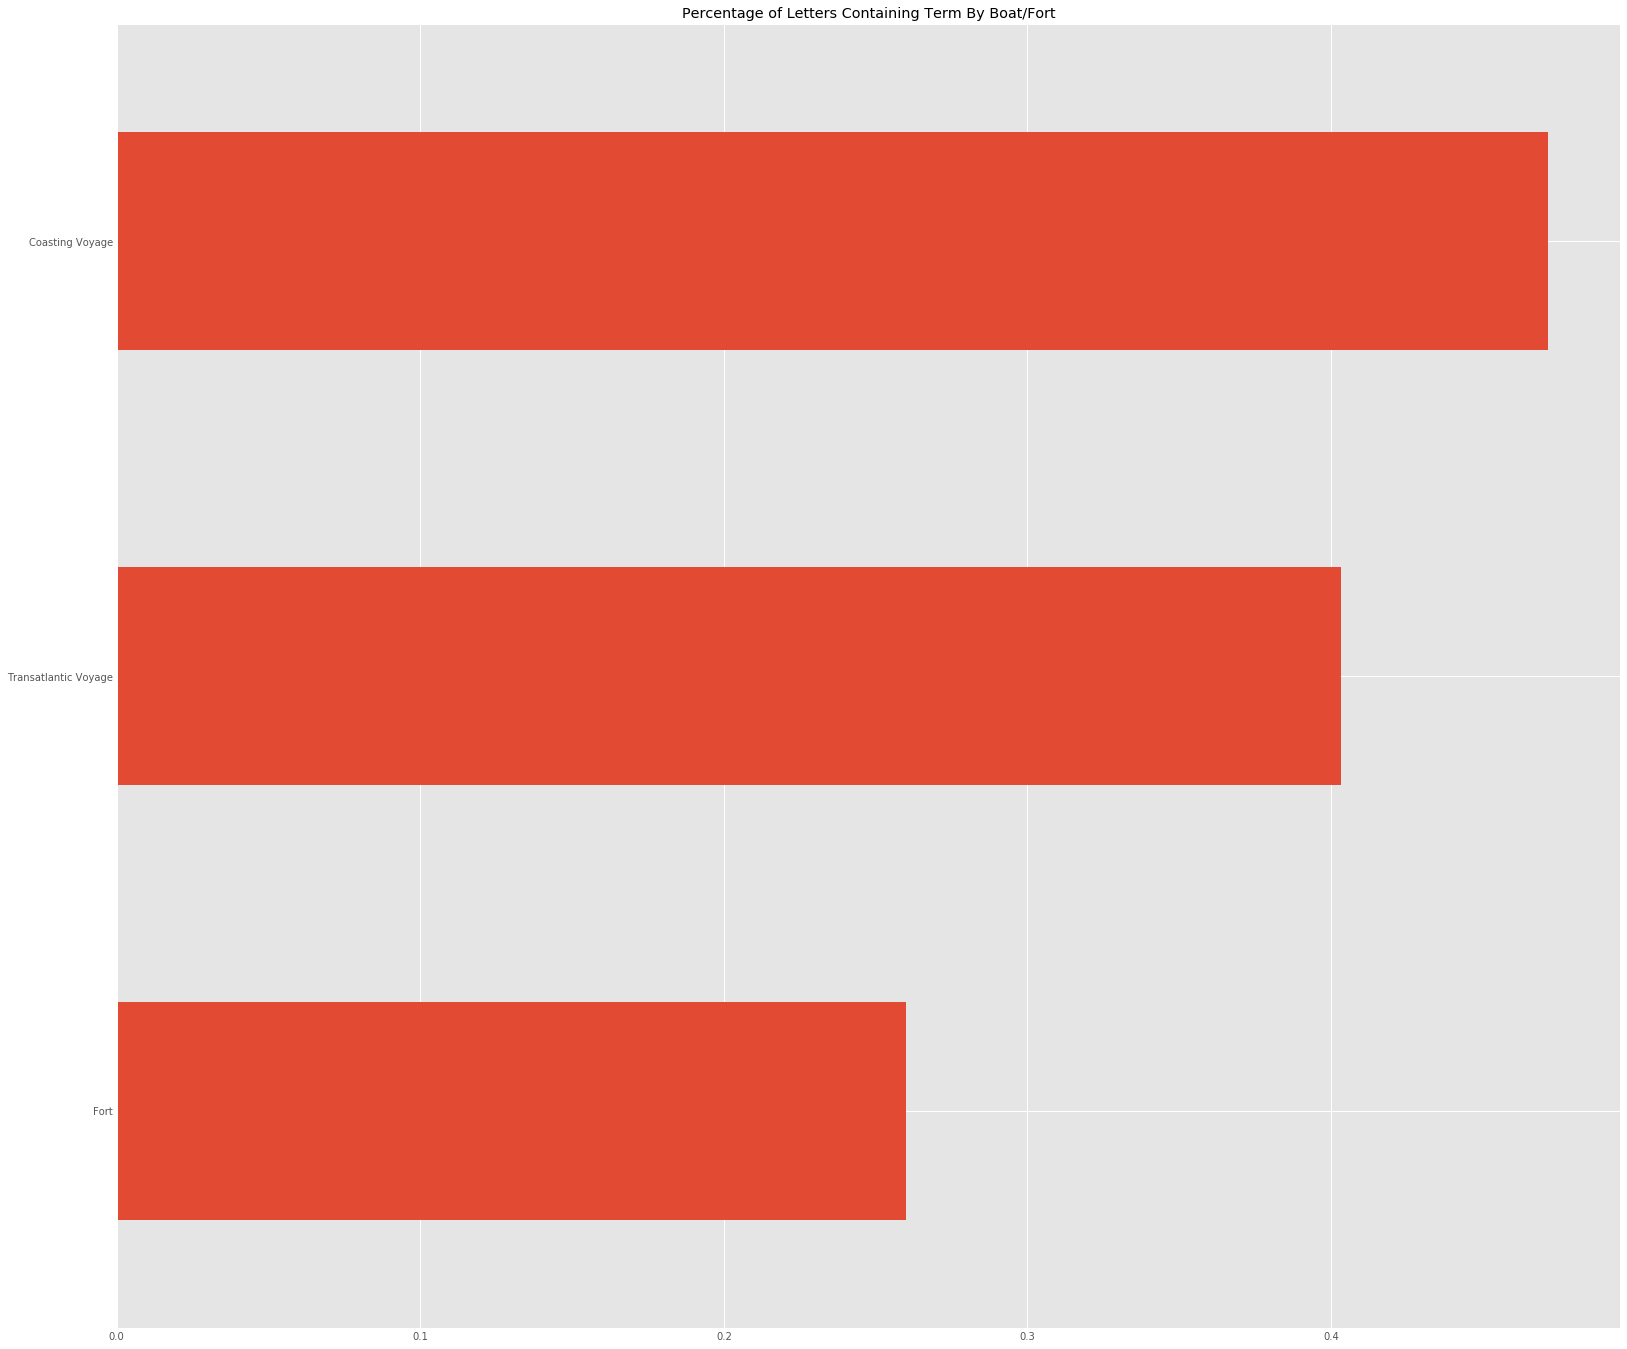

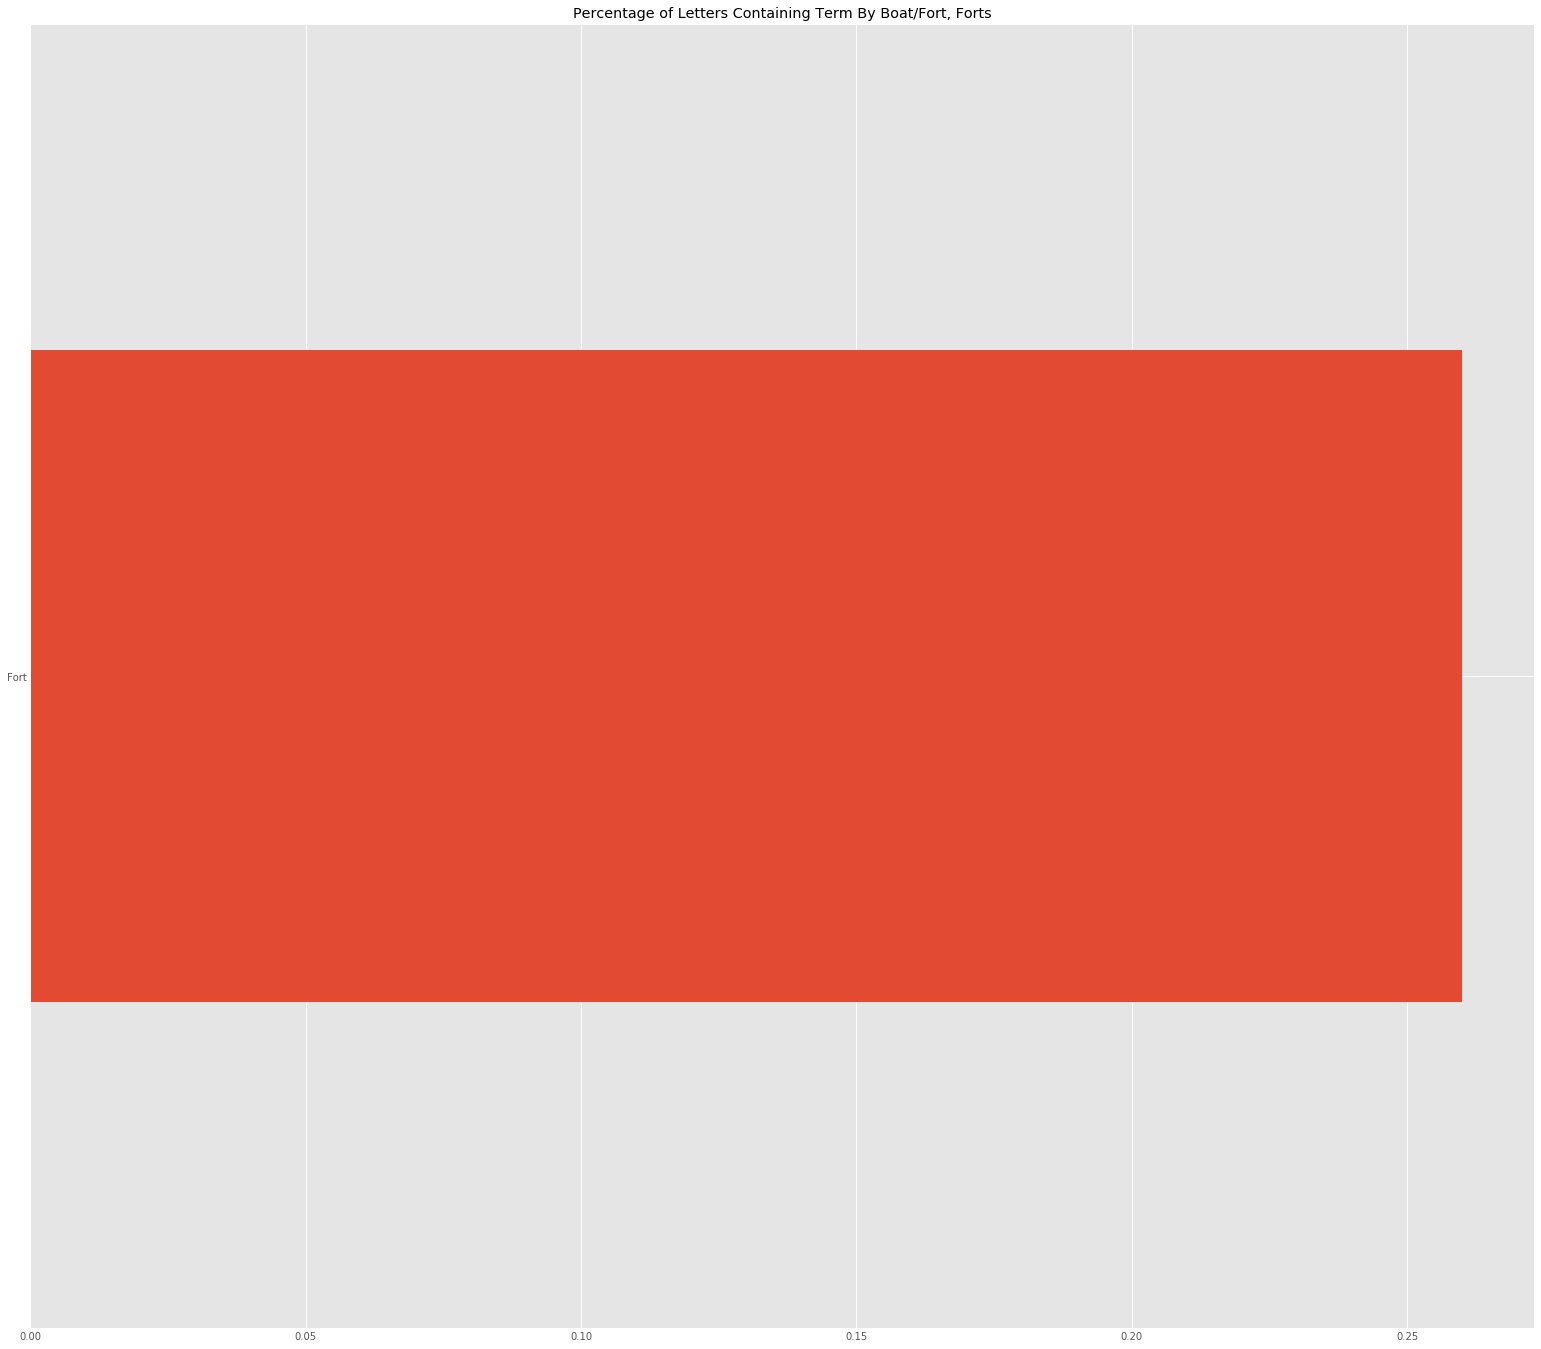

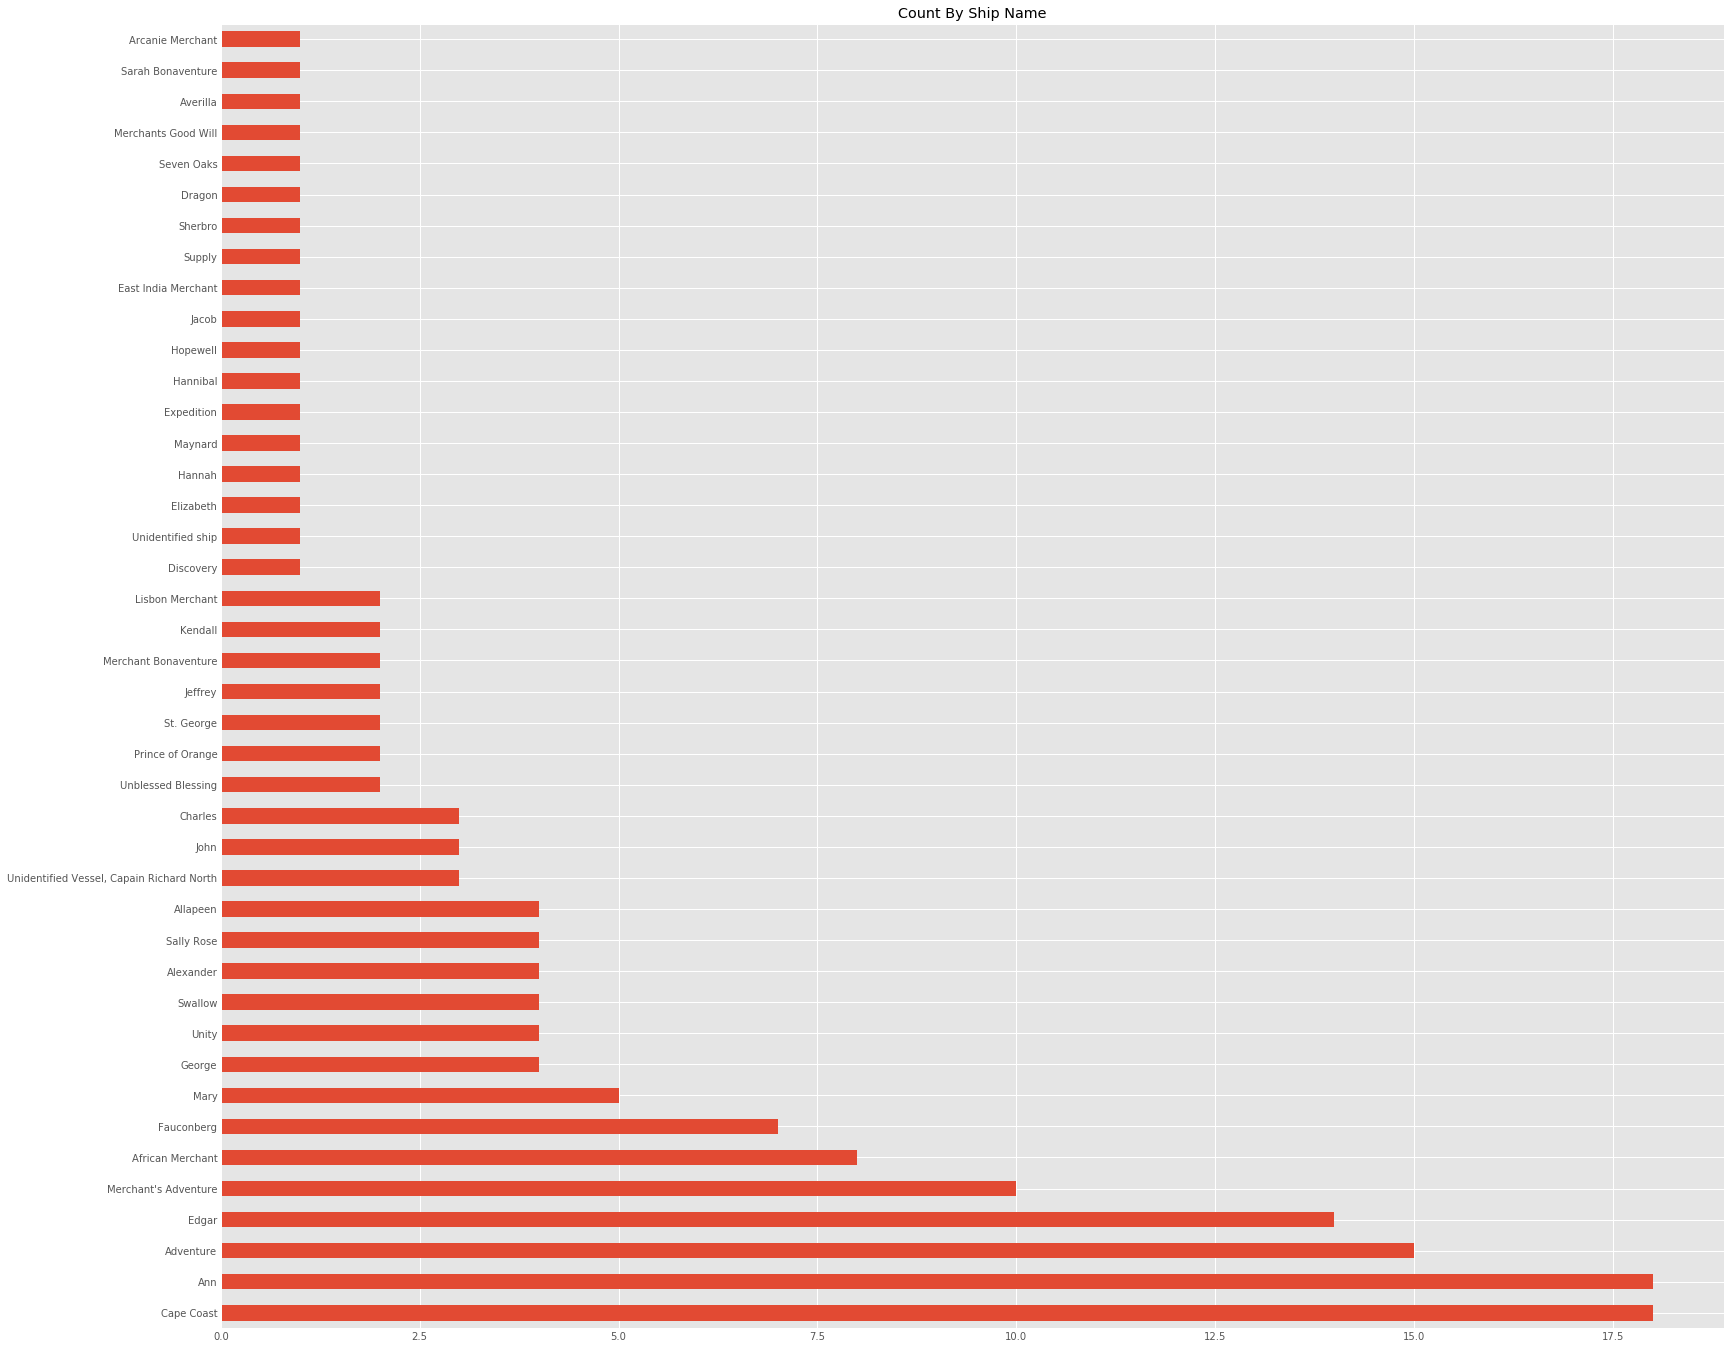

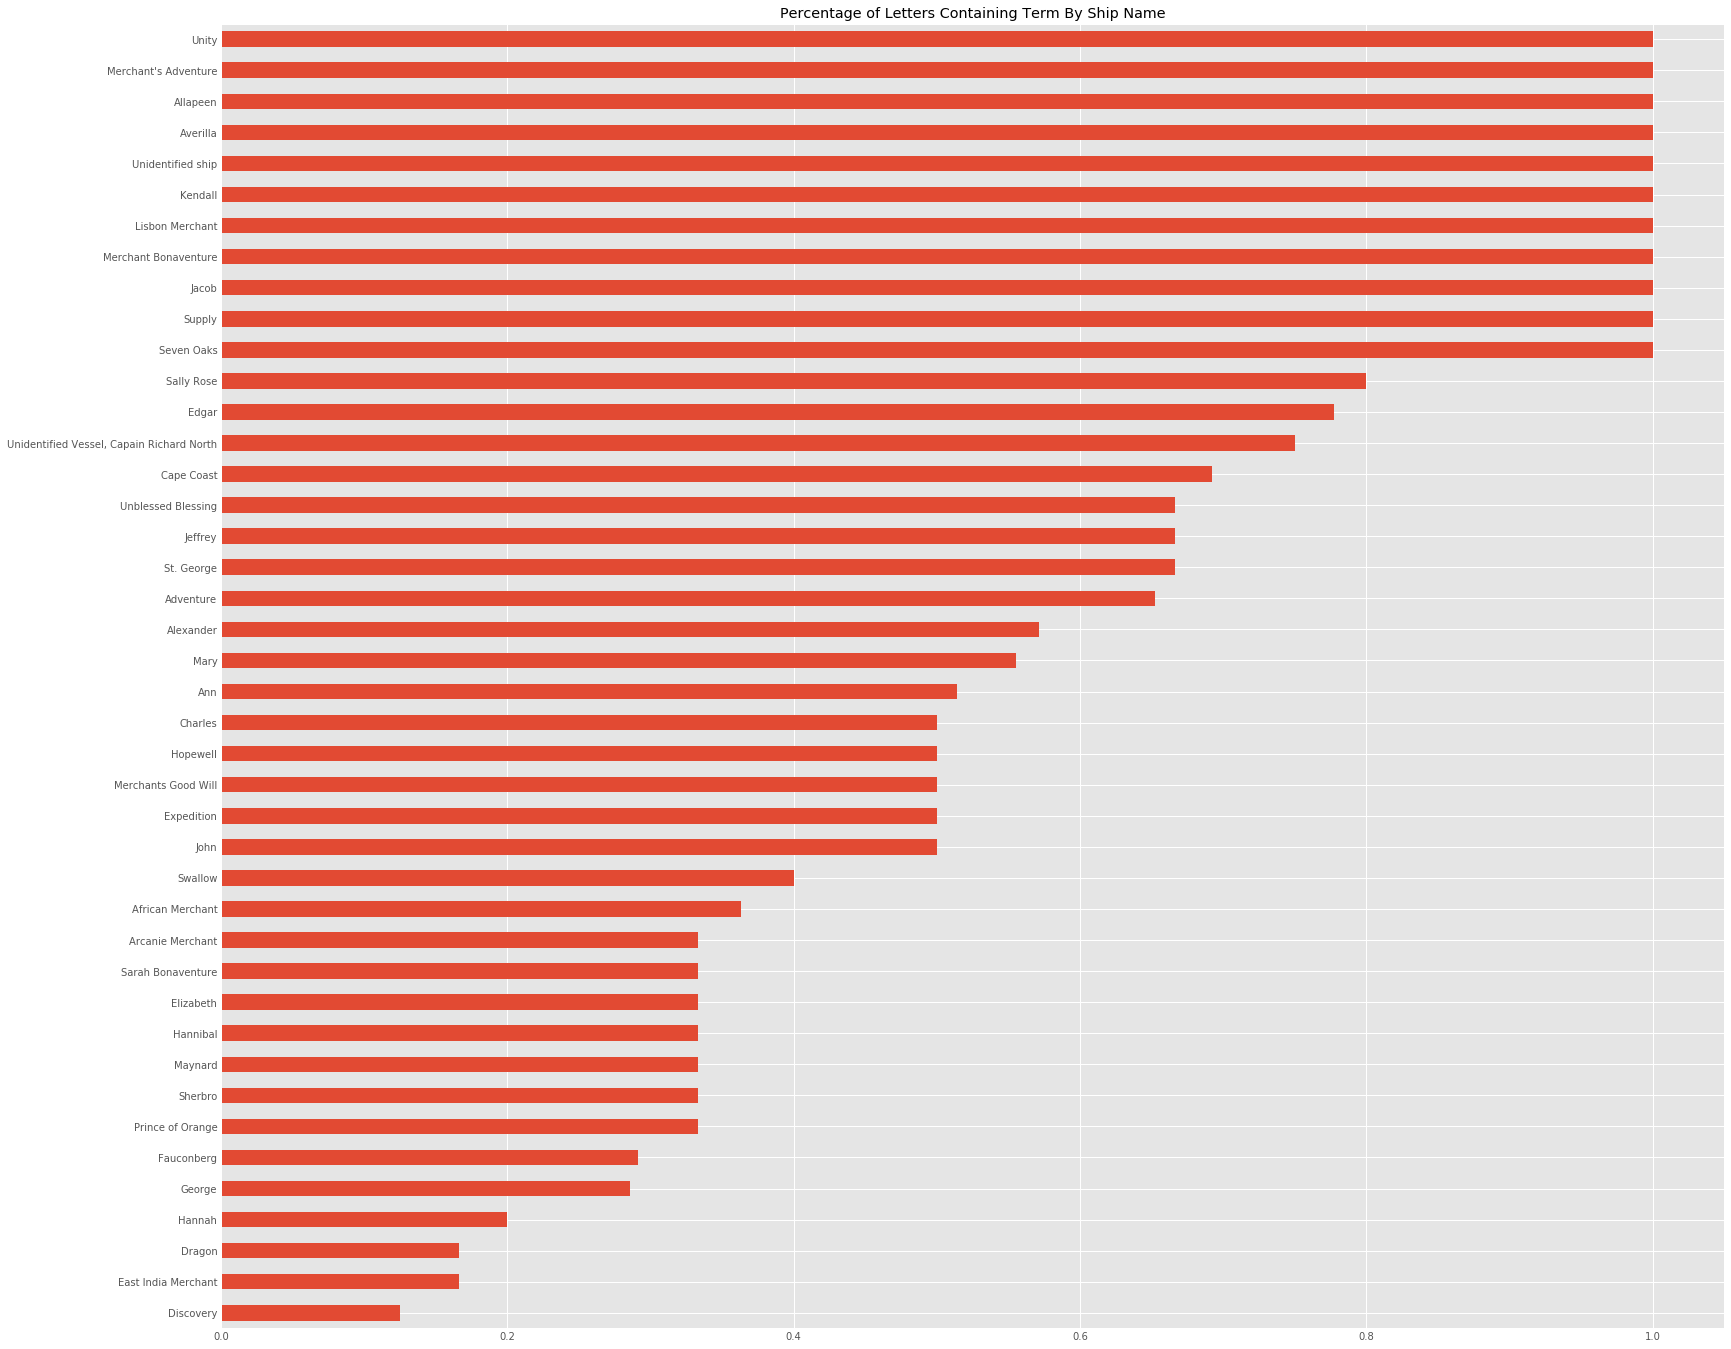

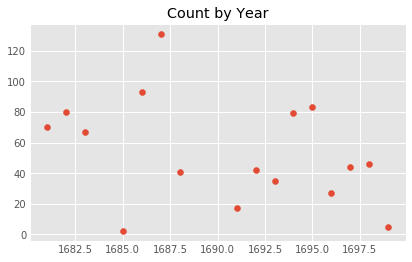

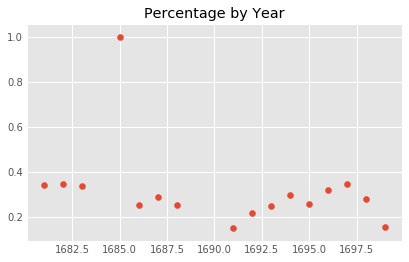

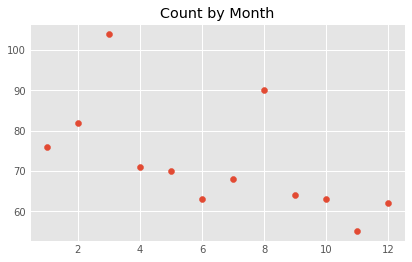

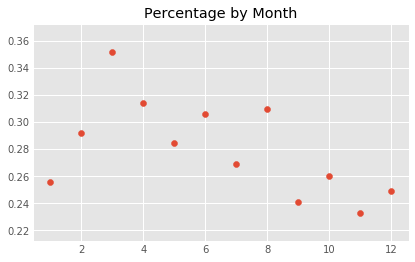

In [141]:
# Modify the terms within the brackets below to modify search. Terms need to be wrapped in parentheses and comma separated.
# The square brackets should be left unchanged.
terms = ['slaves']


# DO NOT CHANGE ANYTHING BELOW!!!
def return_terms_found(text, terms):
    for term in terms:
        if term in text.split(' '):
            return True
    
    return False

df['filtered'] = df['text_cleaned_dealiased'].apply(return_terms_found, args=(terms,))

df_subset = df[df['filtered'] == True]

print('Filtering for term:', terms, '({} total letters)'.format(len(df_subset)))

print('First 5 rows of filtered dataframe:')
display(df_subset.head())

print('UIDs of letters containing the term:')
print(df_subset['UID'].values)

for column in ['Place Sent From', 'Sender', 'Boat/Fort', 'Ship Name']:
    try:
        plt.figure(figsize=(24, 24))
        df_subset[column].value_counts().plot(kind='barh', title='Count By {}'.format(column))
    except:
        print('ERROR: All metadata for this column are null')
    try:
        plt.figure(figsize=(24, 24))
        (df_subset[column].value_counts() / df[column].value_counts()).sort_values().dropna().plot(kind='barh', title='Percentage of Letters Containing Term By {}'.format(column))
    except:
        print('ERROR: All metadata for this column are null')
    if column != 'Ship Name':
        try:
            plt.figure(figsize=(24, 24))
            (df_subset[df_subset['Boat/Fort'] == 'Fort'][column].value_counts() / df[df['Boat/Fort'] == 'Fort'][column].value_counts())\
                .sort_values()\
                .dropna()\
                .plot(kind='barh', title='Percentage of Letters Containing Term By {}, Forts'.format(column))
        except:
            print('ERROR: Filtering for Fort')

plt.figure()
plt.title('Count by Year')
plt.scatter(df_subset.groupby('Year').count()['UID'].index, df_subset.groupby('Year').count()['UID'])

plt.figure()
plt.title('Percentage by Year')
plt.scatter((df_subset.groupby('Year').count()['UID'] / df.groupby('Year').count()['UID']).dropna().index, (df_subset.groupby('Year').count()['UID'] / df.groupby('Year').count()['UID']).dropna())


plt.figure()
plt.title('Count by Month')
plt.scatter(df_subset.groupby('Month').count()['UID'].index, df_subset.groupby('Month').count()['UID'])

plt.figure()
plt.title('Percentage by Month')
plt.scatter((df_subset.groupby('Month').count()['UID'] / df.groupby('Month').count()['UID']).dropna().index, (df_subset.groupby('Month').count()['UID'] / df.groupby('Month').count()['UID']).dropna())